# Featurizer

In [9]:
from cider.datastore import DataStore
from cider.featurizer import Featurizer

Load some mobile phone metadata. See {doc}`standardized data formats <../data_formats/cdr>` for file schemas. 

In [2]:
# This path should point to your cider installation, where configs and data for this demo are located.
from pathlib import Path
cider_installation_directory = Path('../../cider')

datastore = DataStore(config_file_path_string= cider_installation_directory / 'configs' / 'config_quickstart.yml')
featurizer = Featurizer(datastore=datastore, clean_folders=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/31 13:21:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Loading CDR...


Loading recharges...
SUCCESS!
Loading mobile data...
Loading mobile data...
Loading antennas...


Remove duplicate records, filter to just a specific date range, remove outlier days and spammers based on call and text volumes, and remove duplicate records in CDR, recharges, mobile data records, and mobile money records.

In [3]:
# Deduplication
featurizer.ds.deduplicate()

# Filter to just January 1 - February 28 (inclusive)
featurizer.ds.filter_dates('2020-01-01', '2020-02-28')

# Remove transactions involving spammers who place 1.8+ calls/texts per active day
spammers = featurizer.ds.remove_spammers(spammer_threshold=1.8)

Number of spammers identified: 19


In [4]:
# Remove all records from days more than 2 standard deviations from the mean transaction volume
outlier_days = featurizer.ds.filter_outlier_days(num_sds=2)

Outliers removed: 2020-01-24, 2020-02-06


/Users/leo/Documents/gpl/cider/cider/datastore.py:435: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  timeseries = timeseries.groupby('day', as_index=False).agg('sum')


Produce summary statistics and plots.

In [5]:
print(featurizer.diagnostic_statistics())

{'CDR': {'Days': 59, 'Transactions': 91299, 'Subscribers': 981, 'Recipients': 981}, 'Recharges': {'Days': 59, 'Transactions': 9315, 'Subscribers': 783}, 'Mobile Data': {'Days': 59, 'Transactions': 9388, 'Subscribers': 592}, 'Mobile Money': {'Days': 59, 'Transactions': 5371, 'Subscribers': 682, 'Recipients': 682}}


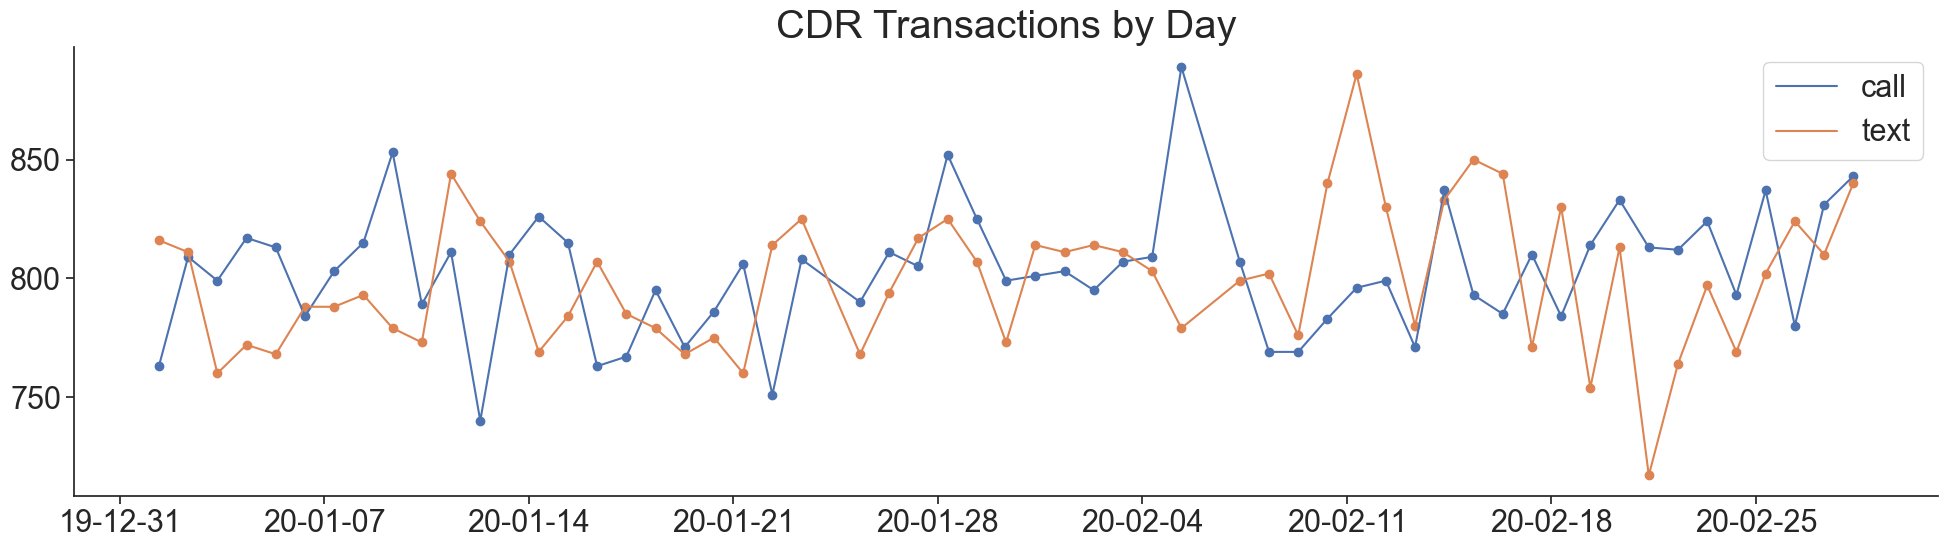

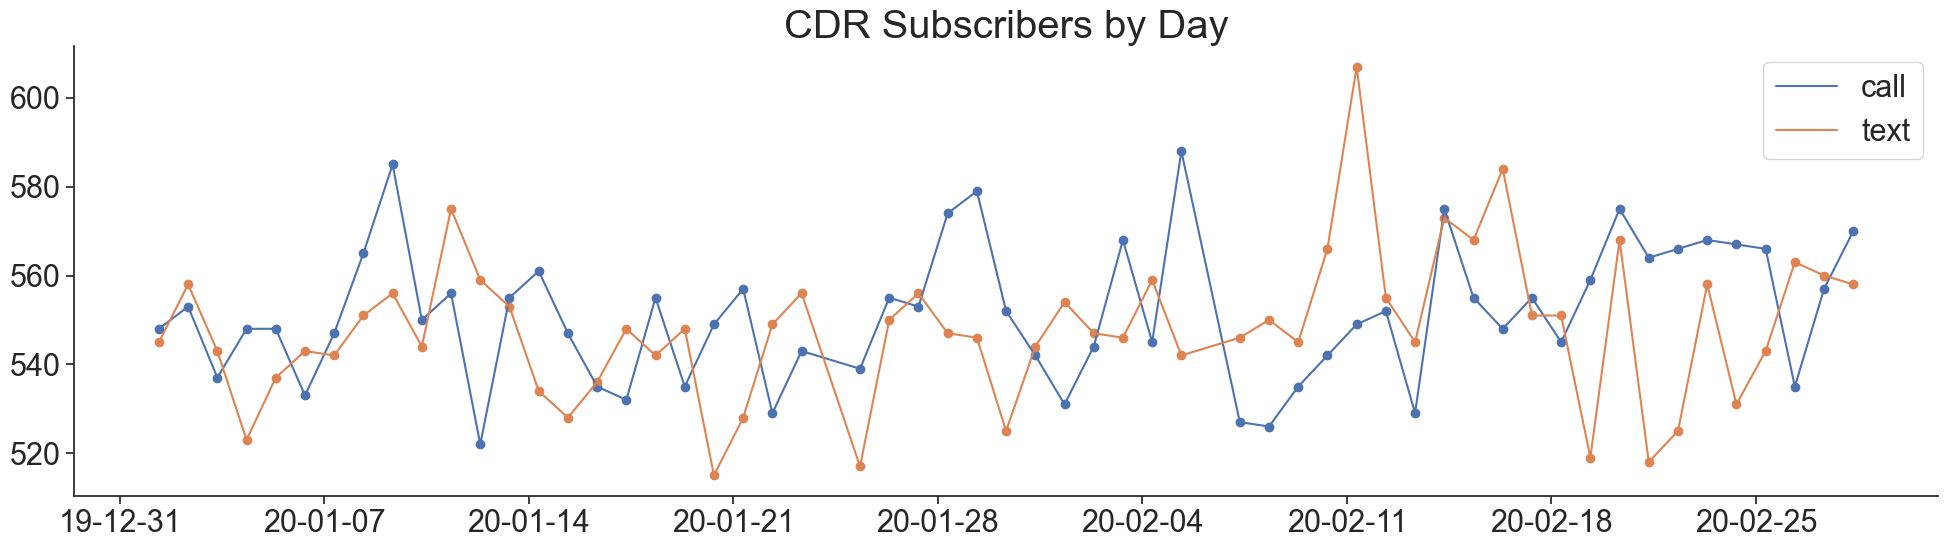

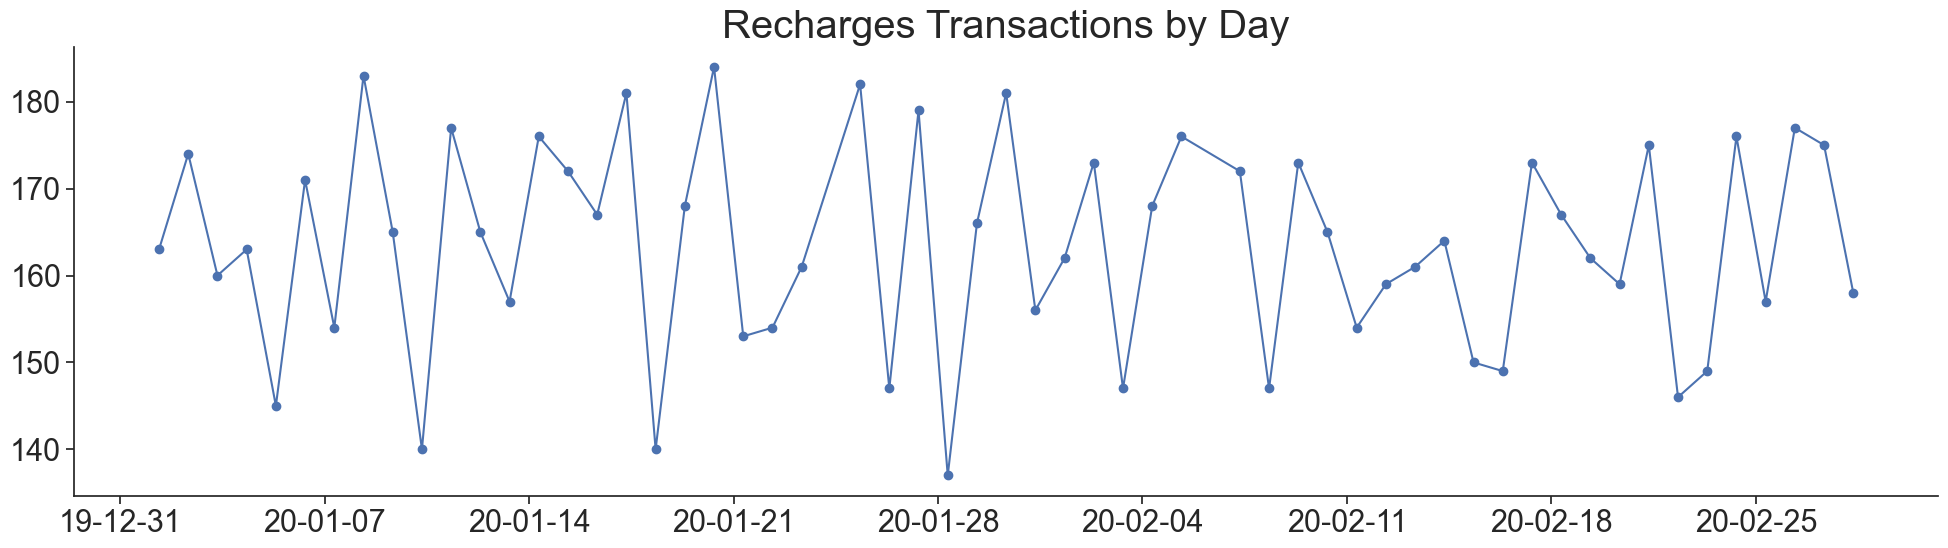

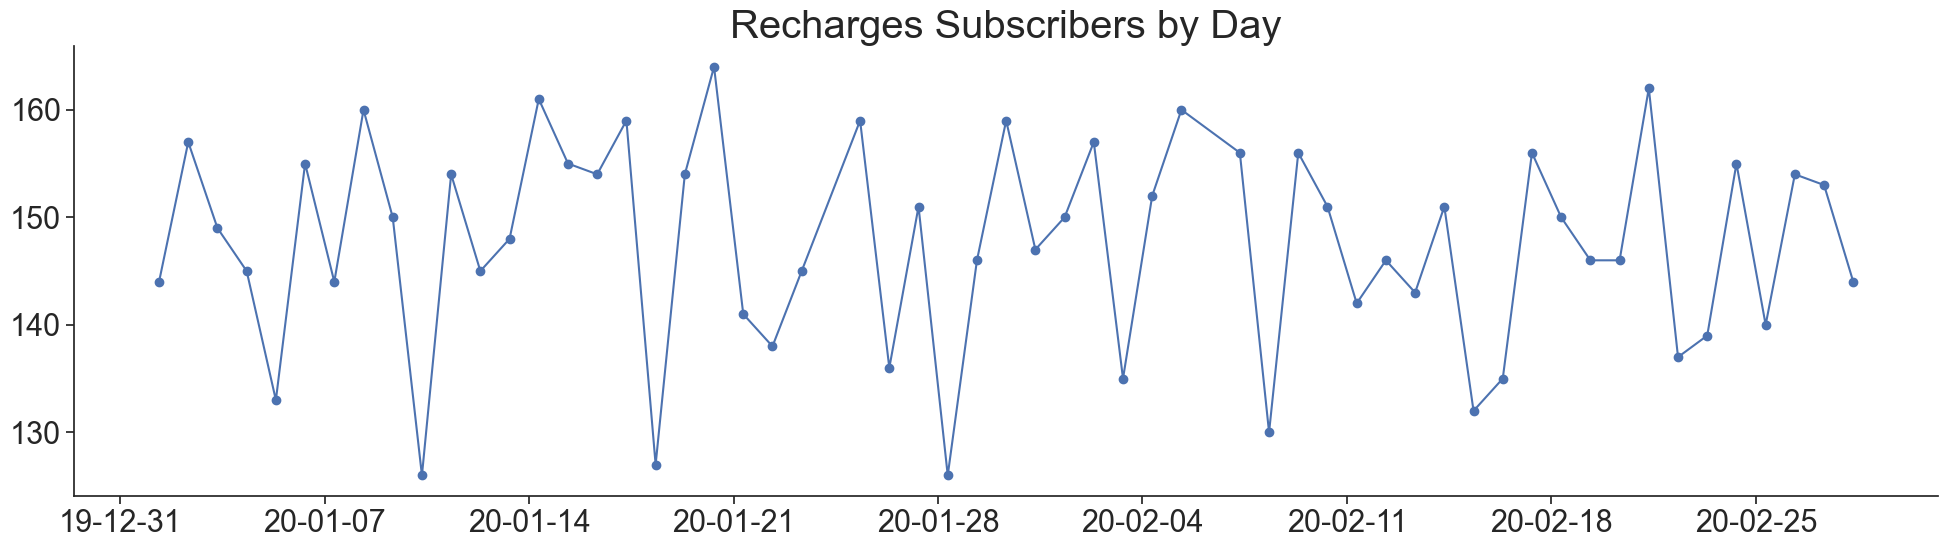

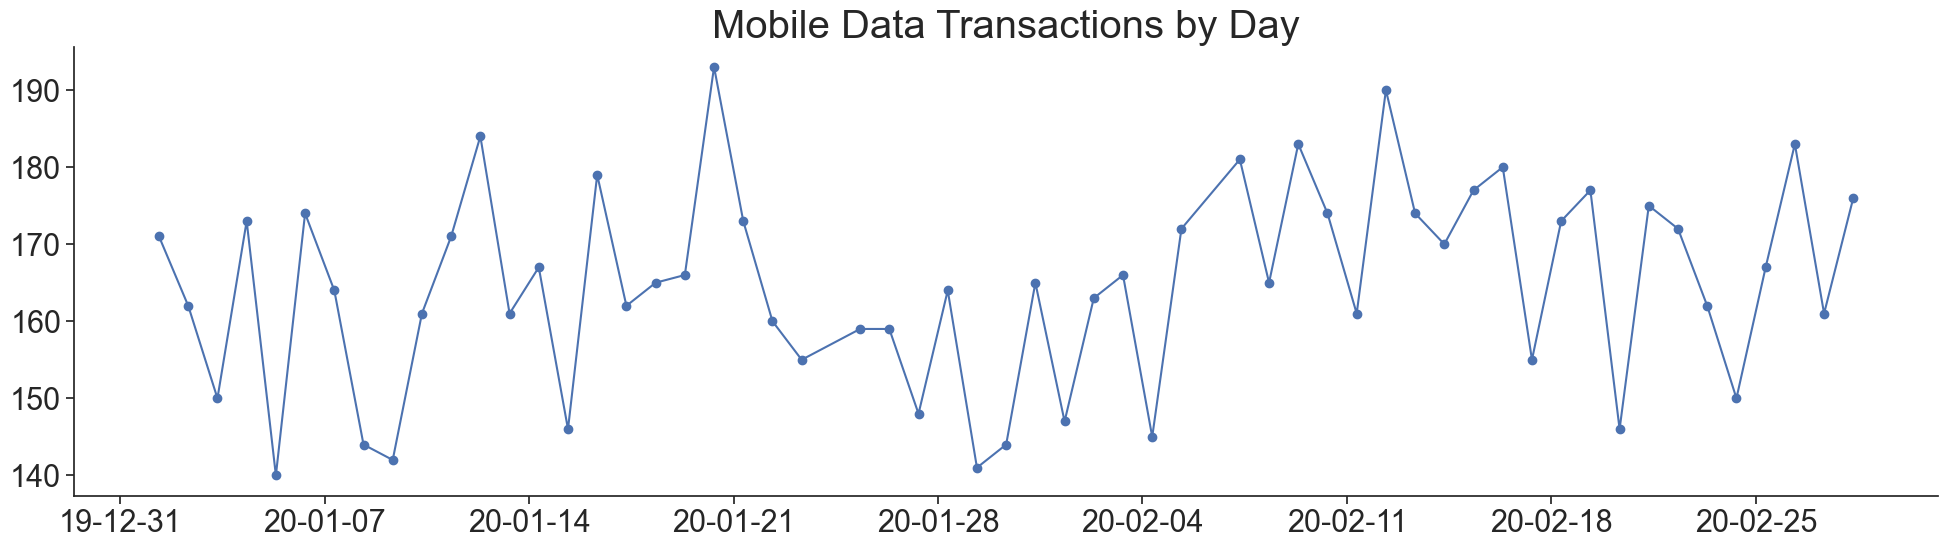

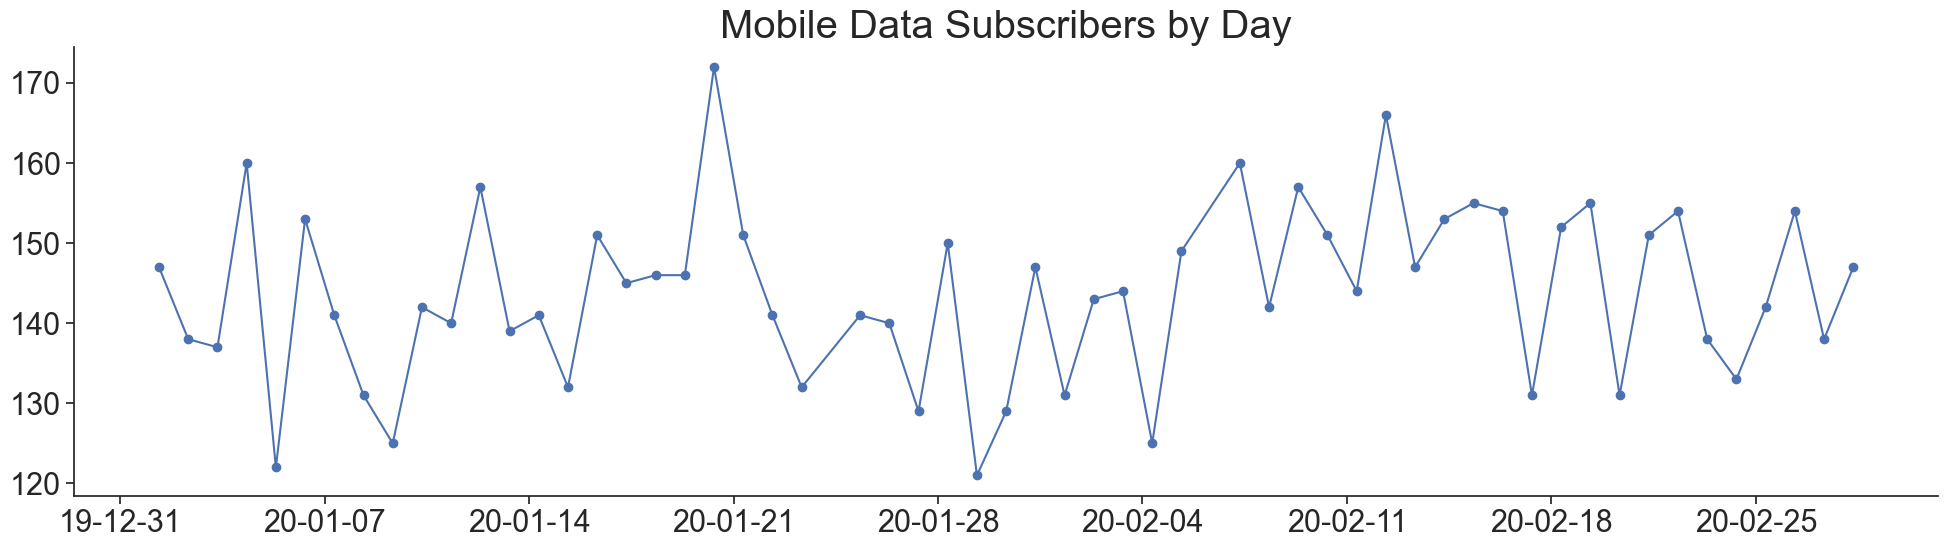

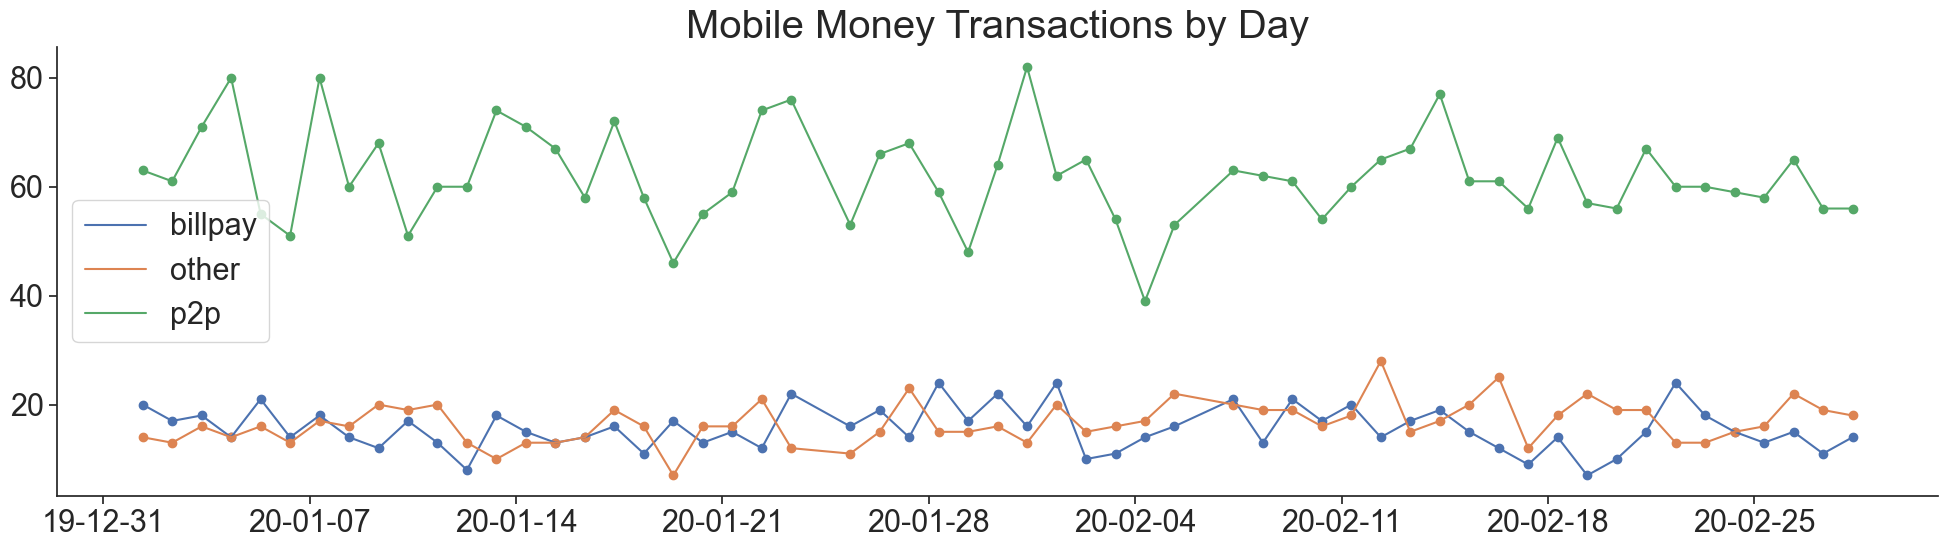

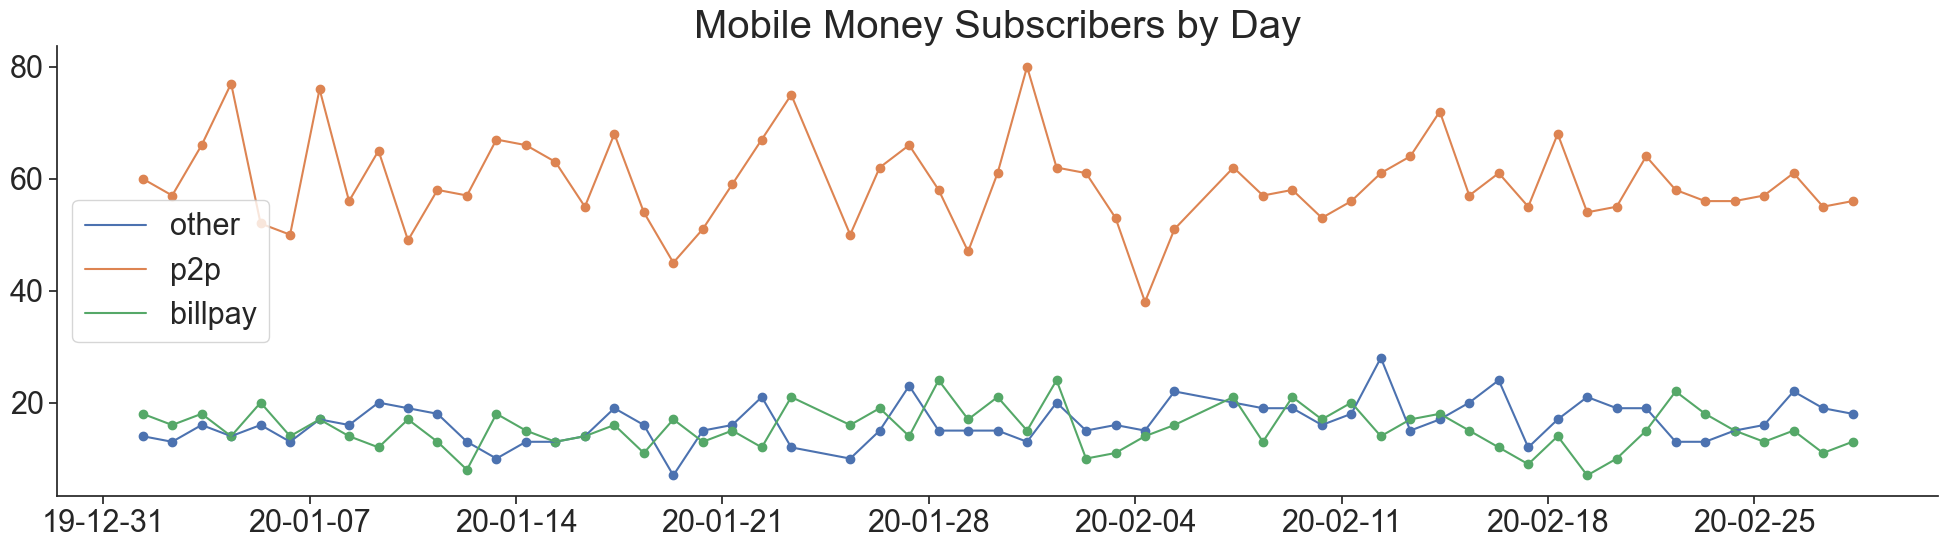

In [6]:
featurizer.diagnostic_plots()

Featurize the data

In [26]:
featurizer.cdr_features_spark()
featurizer.international_features()
featurizer.location_features()
featurizer.recharges_features()
featurizer.mobiledata_features()
featurizer.mobilemoney_features()

featurizer.all_features()

Now we read the features back with pandas in to see what the table looks like. This works fine because our synthetic dataset is small, but such files can be too large to fit in memory if the number of subscribers is large; Cider uses [pyspark](https://spark.apache.org/docs/latest/api/python/) to manage large datasets. Another option for working with large datasets is [dask](https://www.dask.org/).

In [32]:
import pandas as pd
path_to_all_features = datastore.cfg.path.working.directory_path / 'featurizer' / 'datasets' / 'features.csv'
pd.read_csv(path_to_all_features).head()

,name,active_days_allweek_allday,active_days_allweek_day,active_days_allweek_night,active_days_weekday_allday,active_days_weekday_day,active_days_weekday_night,active_days_weekend_allday,active_days_weekend_day,active_days_weekend_night,...,mobilemoney_outgoing_p2p_amount_min,mobilemoney_outgoing_p2p_amount_max,mobilemoney_outgoing_p2p_balance_before_mean,mobilemoney_outgoing_p2p_balance_before_min,mobilemoney_outgoing_p2p_balance_before_max,mobilemoney_outgoing_p2p_balance_after_mean,mobilemoney_outgoing_p2p_balance_after_min,mobilemoney_outgoing_p2p_balance_after_max,mobilemoney_outgoing_p2p_txns,mobilemoney_outgoing_p2p_contacts
0,AASxnSdfla,56,46,50,40,31,35,16,15,15,...,31.799332,58.921886,187.554639,138.324660,228.47707,138.780946,106.525330,180.20863,6.0,6.0
1,ANnpaBqoKb,55,45,47,40,36,33,15,9,14,...,37.976850,57.337646,182.190155,158.963560,223.29039,137.548449,106.978870,185.31354,3.0,3.0
2,AWrbWzWkYp,55,45,46,39,32,33,16,13,13,...,53.090126,58.511192,202.108686,108.117546,272.34055,146.345222,52.118343,219.25041,4.0,4.0
3,AaJProAtlR,56,48,48,41,36,34,15,12,14,...,32.858997,68.323395,235.638050,194.502760,287.86615,188.334709,143.178710,242.73692,4.0,4.0
4,ApDvhzOUJr,56,39,51,40,28,36,16,11,15,...,44.307076,52.375270,192.653709,185.676930,199.63050,144.312531,133.301650,155.32341,2.0,2.0


Plot the distributions of some of the features.

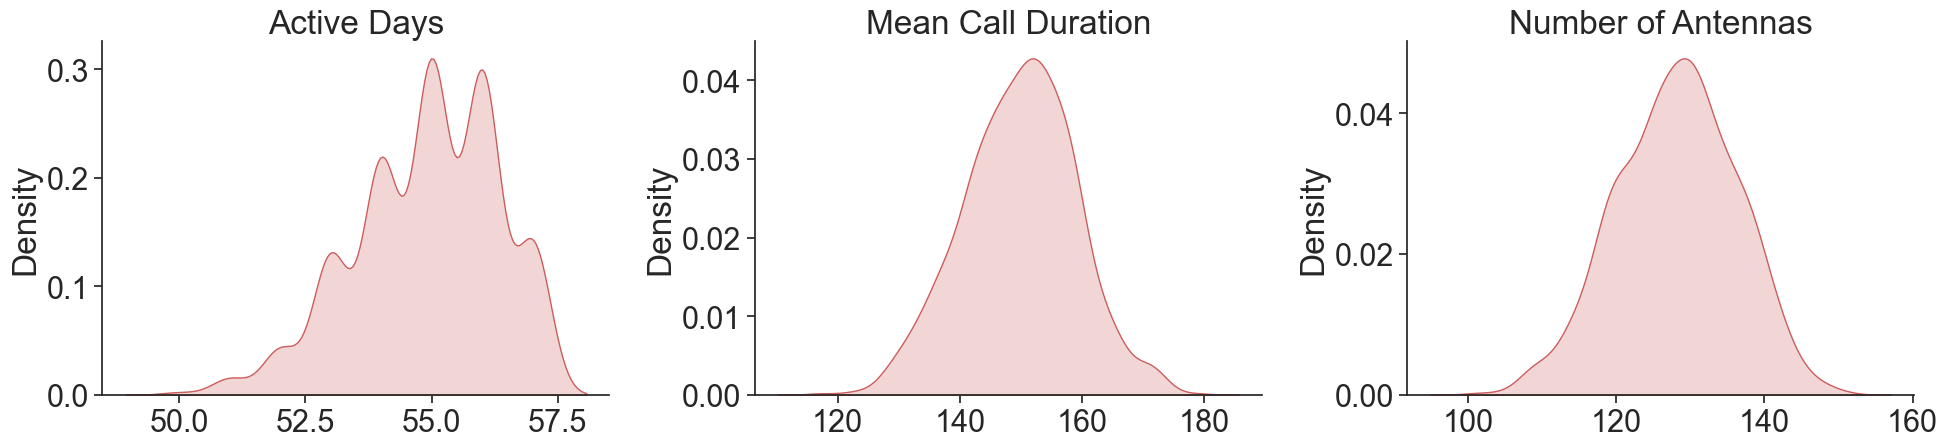

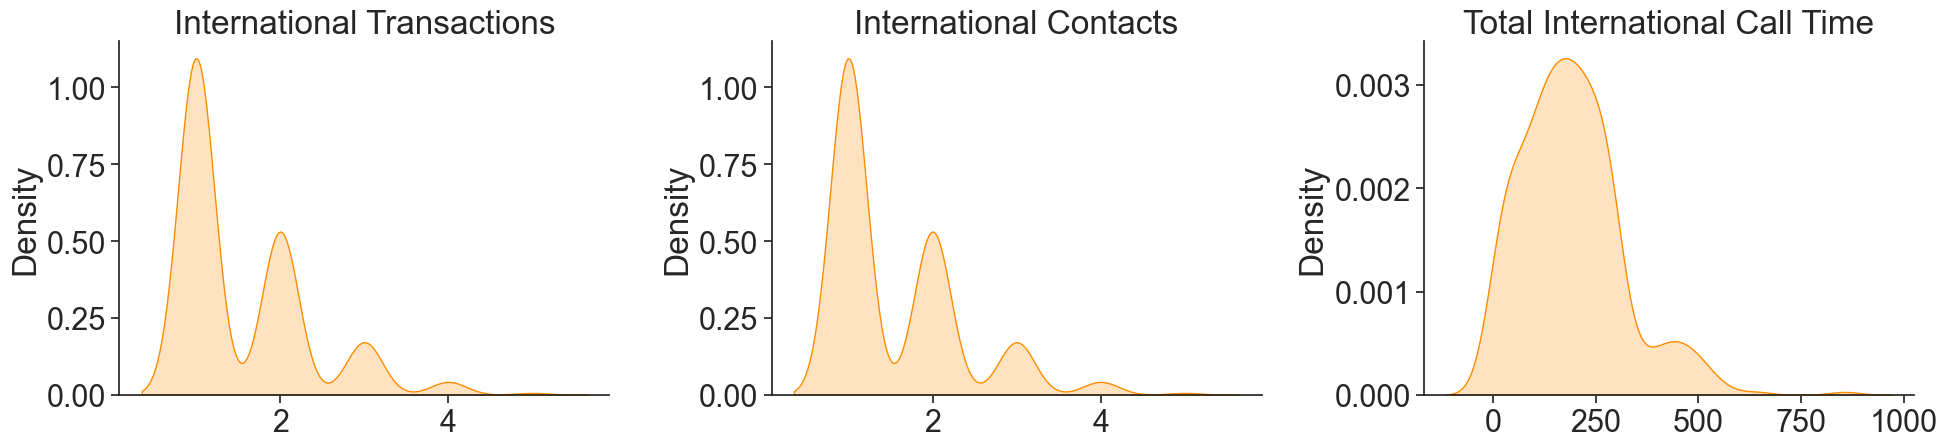

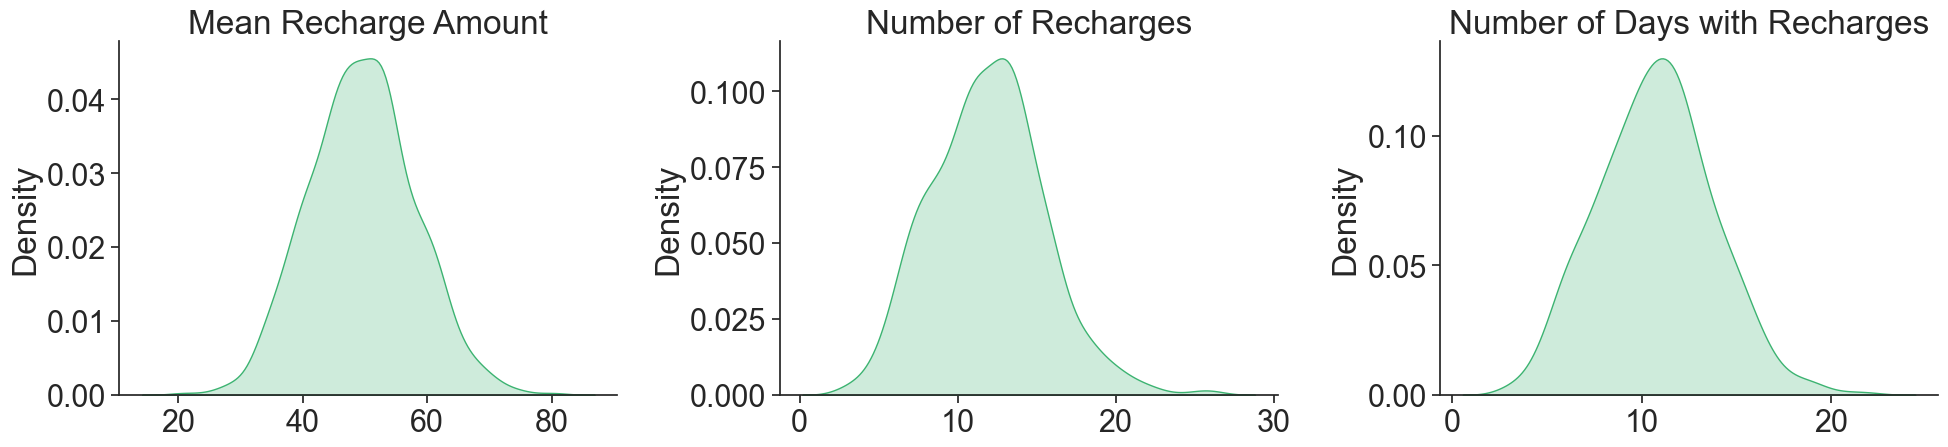

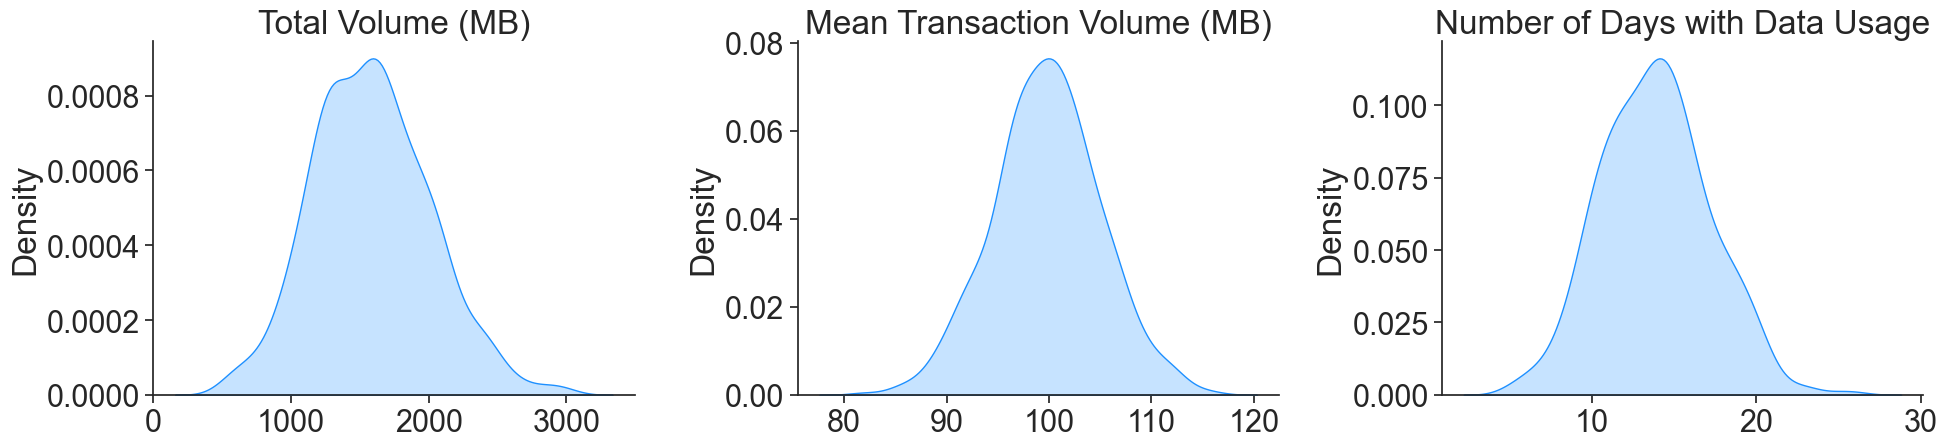

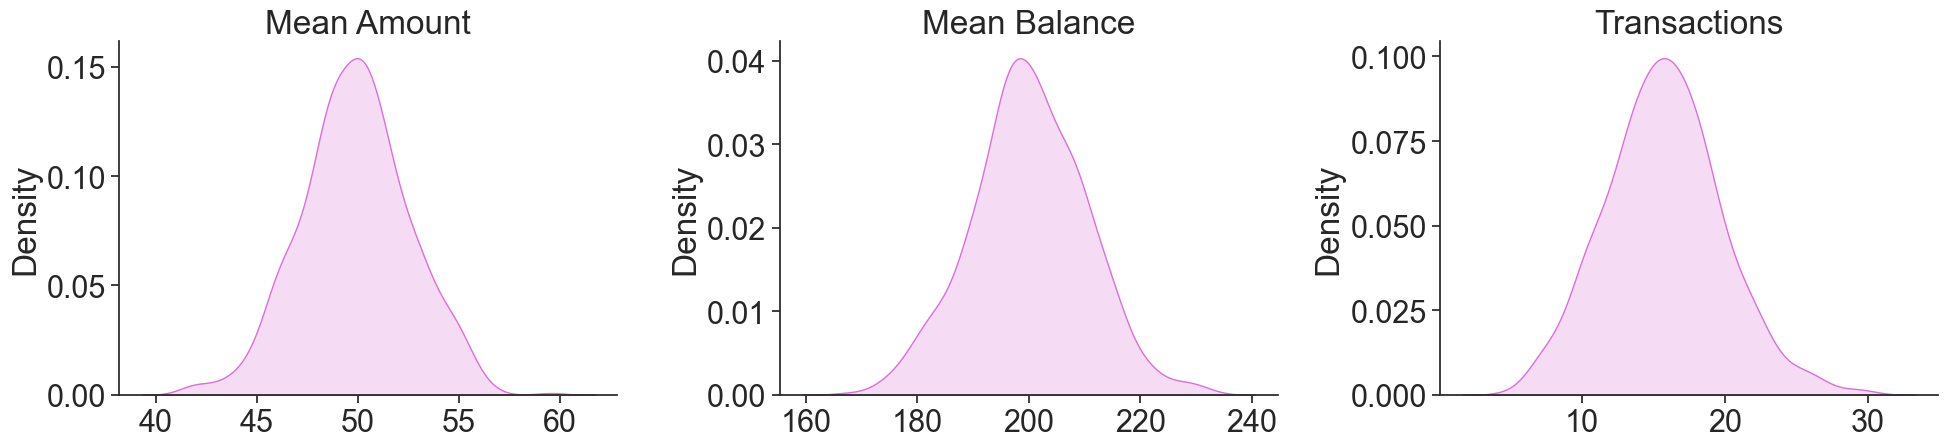

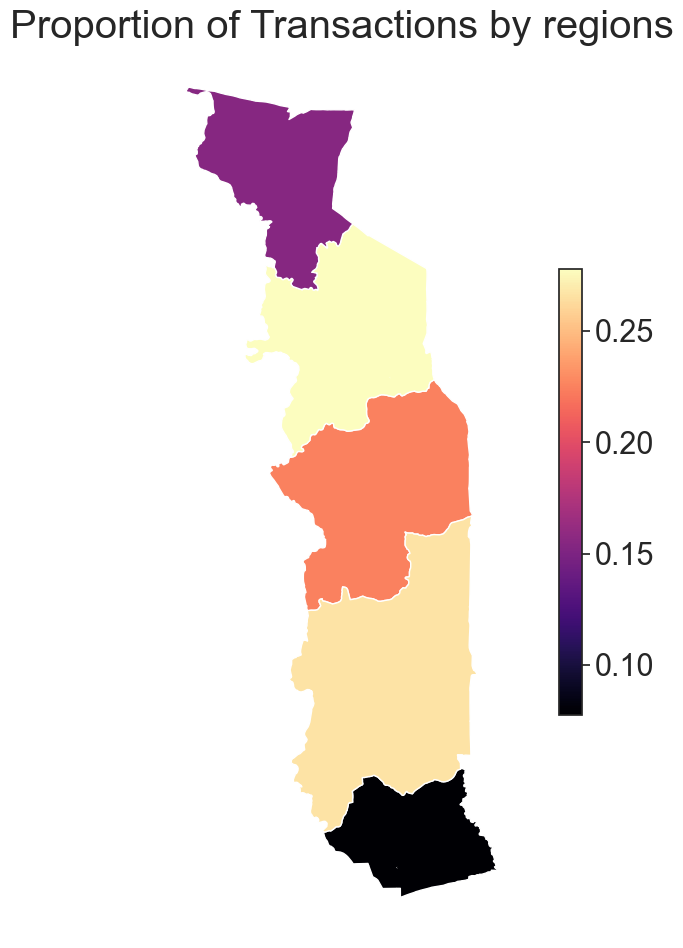

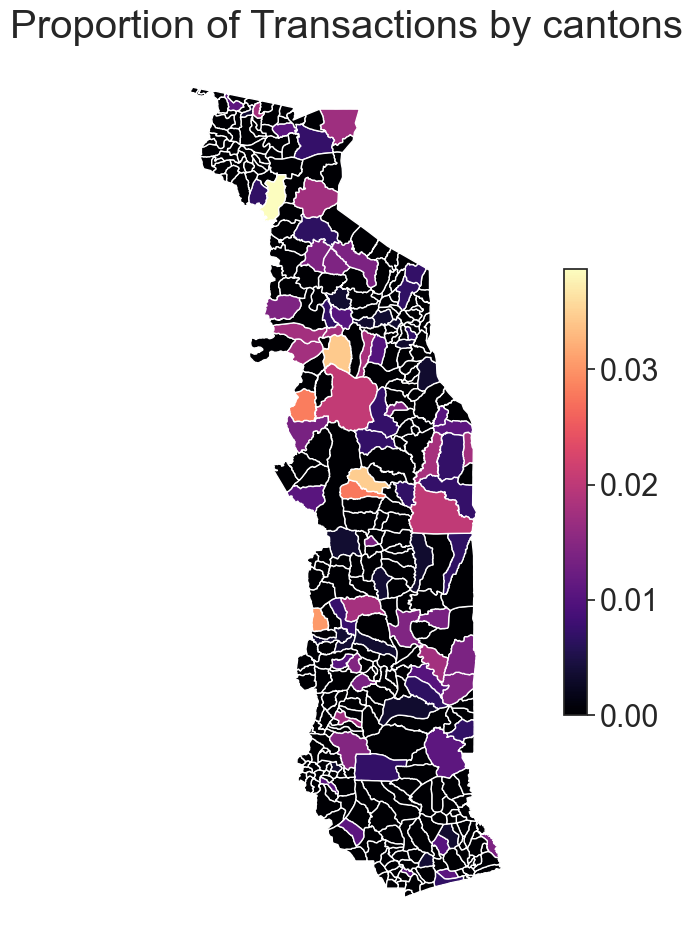

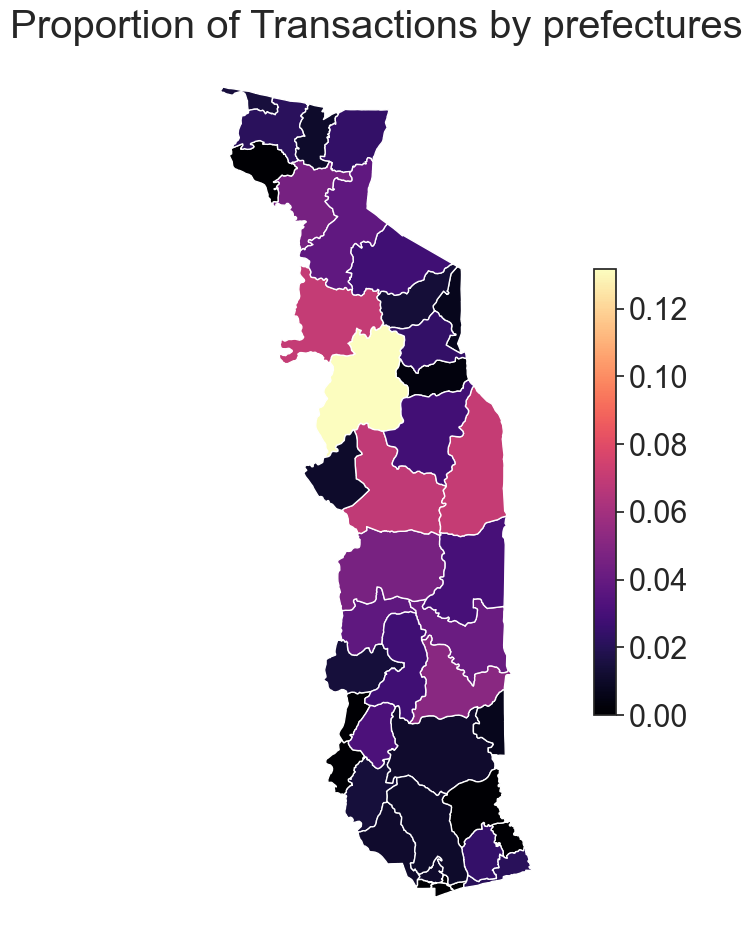

AnalysisException: Column 'cdr_active_days__allweek__day__callandtext' does not exist. Did you mean one of the following? [active_days_allweek_allday, active_days_weekday_allday, active_days_allweek_day, active_days_allweek_night, active_days_weekday_night, active_days_weekend_allday, active_days_weekday_day, active_days_weekend_night, call_duration_allweek_day_call_max, call_duration_allweek_day_call_mean, call_duration_allweek_day_call_std, active_days_weekend_day, call_duration_allweek_day_call_median, call_duration_allweek_day_call_min, interevent_time_allweek_day_call_max, interevent_time_allweek_day_call_mean, interevent_time_allweek_day_call_std, balance_of_contacts_allweek_day_call_max, balance_of_contacts_allweek_day_call_mean, balance_of_contacts_allweek_day_call_std, call_duration_allweek_allday_call_max, call_duration_allweek_allday_call_mean, call_duration_allweek_allday_call_std, call_duration_allweek_day_call_kurtosis, call_duration_allweek_day_call_skewness, interevent_time_allweek_day_call_median, interevent_time_allweek_day_call_min, balance_of_contacts_allweek_day_call_median, balance_of_contacts_allweek_day_call_min, call_duration_allweek_allday_call_median, call_duration_allweek_allday_call_min, call_duration_allweek_night_call_max, call_duration_allweek_night_call_mean, call_duration_allweek_night_call_std, interevent_time_allweek_allday_call_max, interevent_time_allweek_allday_call_mean, interevent_time_allweek_allday_call_std, interevent_time_allweek_day_call_kurtosis, interevent_time_allweek_day_call_skewness, number_of_contacts_allweek_day_call, number_of_contacts_allweek_day_text, balance_of_contacts_allweek_allday_call_max, balance_of_contacts_allweek_allday_call_mean, balance_of_contacts_allweek_allday_call_std, balance_of_contacts_allweek_day_call_kurtosis, balance_of_contacts_allweek_day_call_skewness, call_duration_allweek_allday_call_kurtosis, call_duration_allweek_allday_call_skewness, call_duration_allweek_night_call_median, call_duration_allweek_night_call_min, call_duration_weekday_day_call_max, call_duration_weekday_day_call_mean, call_duration_weekday_day_call_std, call_duration_weekend_day_call_max, call_duration_weekend_day_call_mean, call_duration_weekend_day_call_std, entropy_of_contacts_allweek_day_call, entropy_of_contacts_allweek_day_text, entropy_of_contacts_weekday_allday_text, interactions_per_contact_allweek_day_call_max, interactions_per_contact_allweek_day_call_mean, interactions_per_contact_allweek_day_call_std, interevent_time_allweek_allday_call_median, interevent_time_allweek_allday_call_min, interevent_time_allweek_night_call_max, interevent_time_allweek_night_call_mean, interevent_time_allweek_night_call_std, number_of_contacts_allweek_allday_text, number_of_contacts_weekday_allday_text, percent_at_home_allweek_allday, percent_at_home_weekday_allday, percent_nocturnal_weekday_call, percent_nocturnal_weekday_text, response_delay_text_allweek_day_max, response_delay_text_allweek_day_mean, response_delay_text_allweek_day_median, response_delay_text_allweek_day_skewness, response_delay_text_weekday_allday_max, response_delay_text_weekday_allday_mean, response_rate_text_weekday_allday, balance_of_contacts_allweek_allday_call_median, balance_of_contacts_allweek_allday_call_min, balance_of_contacts_allweek_night_call_max, balance_of_contacts_allweek_night_call_mean, balance_of_contacts_allweek_night_call_std, call_duration_allweek_night_call_kurtosis, call_duration_allweek_night_call_skewness, call_duration_weekday_day_call_median, call_duration_weekday_day_call_min, call_duration_weekend_day_call_median, call_duration_weekend_day_call_min, entropy_of_contacts_allweek_allday_text, frequent_antennas_weekday_allday, interactions_per_contact_allweek_day_call_median, interactions_per_contact_allweek_day_call_min, interevent_time_allweek_allday_call_kurtosis, interevent_time_allweek_allday_call_skewness, interevent_time_allweek_day_text_max, interevent_time_allweek_day_text_mean, interevent_time_allweek_day_text_median, interevent_time_allweek_day_text_std, interevent_time_allweek_night_call_median, interevent_time_allweek_night_call_min, number_of_contacts_allweek_allday_call, percent_at_home_allweek_day, response_delay_text_allweek_day_min, response_delay_text_allweek_day_std, response_delay_text_weekday_allday_min, response_delay_text_weekday_allday_std, balance_of_contacts_allweek_allday_call_kurtosis, balance_of_contacts_allweek_allday_call_skewness, balance_of_contacts_allweek_day_text_max, balance_of_contacts_allweek_day_text_mean, balance_of_contacts_allweek_day_text_median, balance_of_contacts_allweek_day_text_std, balance_of_contacts_allweek_night_call_median, balance_of_contacts_allweek_night_call_min, balance_of_contacts_weekday_day_call_max, balance_of_contacts_weekday_day_call_mean, balance_of_contacts_weekday_day_call_std, balance_of_contacts_weekend_day_call_max, balance_of_contacts_weekend_day_call_mean, balance_of_contacts_weekend_day_call_std, call_duration_weekday_allday_call_max, call_duration_weekday_allday_call_mean, call_duration_weekday_allday_call_std, call_duration_weekday_day_call_kurtosis, call_duration_weekday_day_call_skewness, call_duration_weekend_day_call_kurtosis, call_duration_weekend_day_call_skewness, entropy_of_antennas_weekday_allday, entropy_of_contacts_allweek_allday_call, entropy_of_contacts_weekday_day_text, entropy_of_contacts_weekend_allday_text, frequent_antennas_allweek_allday, interactions_per_contact_allweek_allday_call_max, interactions_per_contact_allweek_allday_call_mean, interactions_per_contact_allweek_allday_call_std, interactions_per_contact_allweek_day_call_kurtosis, interactions_per_contact_allweek_day_call_skewness, interevent_time_allweek_day_text_kurtosis, interevent_time_allweek_day_text_min, interevent_time_allweek_day_text_skewness, interevent_time_allweek_night_call_kurtosis, interevent_time_allweek_night_call_skewness, interevent_time_weekday_day_call_max, interevent_time_weekday_day_call_mean, interevent_time_weekday_day_call_std, interevent_time_weekend_day_call_max, interevent_time_weekend_day_call_mean, interevent_time_weekend_day_call_std, number_of_antennas_allweek_allday, number_of_antennas_weekday_allday, number_of_contacts_allweek_night_call, number_of_contacts_allweek_night_text, number_of_contacts_weekday_day_text, number_of_contacts_weekend_allday_text, number_of_interactions_in_allweek_day_call, number_of_interactions_in_allweek_day_text, number_of_interactions_in_weekday_allday_text, number_of_interactions_out_weekday_allday_text, percent_at_home_allweek_night, percent_at_home_weekday_night, percent_at_home_weekend_allday, percent_nocturnal_allweek_call, percent_nocturnal_allweek_text, percent_nocturnal_weekend_call, percent_nocturnal_weekend_text, radius_of_gyration_weekday_allday, response_delay_text_allweek_allday_max, response_delay_text_allweek_allday_mean, response_delay_text_allweek_allday_median, response_delay_text_allweek_allday_skewness, response_delay_text_allweek_day_kurtosis, response_delay_text_weekday_allday_median, response_delay_text_weekday_day_max, response_delay_text_weekday_day_mean, response_delay_text_weekday_day_median, response_delay_text_weekday_day_std, response_delay_text_weekend_allday_max, response_delay_text_weekend_allday_mean, response_rate_text_allweek_allday, response_rate_text_weekday_night, response_rate_text_weekend_allday, balance_of_contacts_allweek_day_text_kurtosis, balance_of_contacts_allweek_day_text_min, balance_of_contacts_allweek_day_text_skewness, balance_of_contacts_allweek_night_call_kurtosis, balance_of_contacts_allweek_night_call_skewness, balance_of_contacts_weekday_allday_text_max, balance_of_contacts_weekday_allday_text_min, balance_of_contacts_weekday_allday_text_std, balance_of_contacts_weekday_day_call_median, balance_of_contacts_weekday_day_call_min, balance_of_contacts_weekend_day_call_median, balance_of_contacts_weekend_day_call_min, call_duration_weekday_allday_call_median, call_duration_weekday_allday_call_min, call_duration_weekday_night_call_max, call_duration_weekday_night_call_mean, call_duration_weekday_night_call_std, call_duration_weekend_allday_call_max, call_duration_weekend_allday_call_mean, call_duration_weekend_allday_call_std, entropy_of_antennas_allweek_allday, entropy_of_contacts_allweek_night_call, entropy_of_contacts_allweek_night_text, entropy_of_contacts_weekday_night_text, frequent_antennas_allweek_day, frequent_antennas_weekday_night, frequent_antennas_weekend_allday, interactions_per_contact_allweek_allday_call_median, interactions_per_contact_allweek_allday_call_min, interactions_per_contact_allweek_night_call_max, interactions_per_contact_allweek_night_call_mean, interactions_per_contact_allweek_night_call_std, interactions_per_contact_weekday_day_call_max, interactions_per_contact_weekday_day_call_mean, interactions_per_contact_weekday_day_call_std, interactions_per_contact_weekend_day_call_max, interactions_per_contact_weekend_day_call_mean, interactions_per_contact_weekend_day_call_std, interevent_time_allweek_allday_text_max, interevent_time_allweek_allday_text_mean, interevent_time_allweek_allday_text_median, interevent_time_allweek_allday_text_min, interevent_time_allweek_allday_text_std, interevent_time_weekday_allday_text_max, interevent_time_weekday_allday_text_min, interevent_time_weekday_allday_text_std, interevent_time_weekday_day_call_median, interevent_time_weekday_day_call_min, interevent_time_weekend_day_call_median, interevent_time_weekend_day_call_min, number_of_antennas_allweek_day, number_of_contacts_weekday_night_text, number_of_interactions_alldir_weekday_allday_text, number_of_interactions_in_allweek_allday_text, number_of_interactions_out_allweek_day_call, number_of_interactions_out_allweek_day_text, percent_at_home_weekday_day, percent_pareto_interactions_weekday_allday_text, radius_of_gyration_allweek_allday, response_delay_text_allweek_allday_min, response_delay_text_allweek_allday_std, response_delay_text_allweek_night_max, response_delay_text_allweek_night_mean, response_delay_text_allweek_night_median, response_delay_text_allweek_night_skewness, response_delay_text_weekday_day_kurtosis, response_delay_text_weekday_day_min, response_delay_text_weekday_day_skewness, response_delay_text_weekday_night_max, response_delay_text_weekday_night_mean, response_delay_text_weekday_night_std, response_delay_text_weekend_allday_min, response_delay_text_weekend_allday_std, response_delay_text_weekend_day_max, response_delay_text_weekend_day_mean, response_delay_text_weekend_day_median, response_delay_text_weekend_day_skewness, response_rate_text_allweek_day, response_rate_text_weekday_day, balance_of_contacts_allweek_allday_text_max, balance_of_contacts_allweek_allday_text_mean, balance_of_contacts_allweek_allday_text_median, balance_of_contacts_allweek_allday_text_min, balance_of_contacts_allweek_allday_text_std, balance_of_contacts_weekday_allday_text_mean, balance_of_contacts_weekday_day_call_kurtosis, balance_of_contacts_weekday_day_call_skewness, balance_of_contacts_weekday_day_text_std, balance_of_contacts_weekend_day_call_kurtosis, balance_of_contacts_weekend_day_call_skewness, call_duration_weekday_allday_call_kurtosis, call_duration_weekday_allday_call_skewness, call_duration_weekday_night_call_median, call_duration_weekday_night_call_min, call_duration_weekend_allday_call_median, call_duration_weekend_allday_call_min, call_duration_weekend_night_call_max, call_duration_weekend_night_call_mean, call_duration_weekend_night_call_std, entropy_of_antennas_allweek_day, entropy_of_antennas_weekday_night, entropy_of_antennas_weekend_allday, entropy_of_contacts_weekday_allday_call, entropy_of_contacts_weekday_day_call, entropy_of_contacts_weekend_day_call, entropy_of_contacts_weekend_day_text, frequent_antennas_allweek_night, frequent_antennas_weekday_day, interactions_per_contact_allweek_allday_call_kurtosis, interactions_per_contact_allweek_allday_call_skewness, interactions_per_contact_allweek_day_text_max, interactions_per_contact_allweek_day_text_mean, interactions_per_contact_allweek_day_text_median, interactions_per_contact_allweek_day_text_std, interactions_per_contact_allweek_night_call_median, interactions_per_contact_allweek_night_call_min, interactions_per_contact_weekday_allday_text_max, interactions_per_contact_weekday_allday_text_min, interactions_per_contact_weekday_allday_text_std, interactions_per_contact_weekday_day_call_median, interactions_per_contact_weekday_day_call_min, interactions_per_contact_weekend_day_call_median, interactions_per_contact_weekend_day_call_min, interevent_time_allweek_allday_text_kurtosis, interevent_time_allweek_allday_text_skewness, interevent_time_allweek_night_text_max, interevent_time_allweek_night_text_mean, interevent_time_allweek_night_text_std, interevent_time_weekday_allday_call_max, interevent_time_weekday_allday_call_mean, interevent_time_weekday_allday_call_std, interevent_time_weekday_allday_text_mean, interevent_time_weekday_day_call_kurtosis, interevent_time_weekday_day_call_skewness, interevent_time_weekday_day_text_std, interevent_time_weekend_day_call_kurtosis, interevent_time_weekend_day_call_skewness, number_of_antennas_allweek_night, number_of_antennas_weekday_night, number_of_antennas_weekend_allday, number_of_contacts_weekday_allday_call, number_of_contacts_weekday_day_call, number_of_contacts_weekend_day_call, number_of_contacts_weekend_day_text, number_of_interactions_in_allweek_allday_call, number_of_interactions_in_weekday_day_text, number_of_interactions_in_weekend_allday_text, number_of_interactions_out_allweek_allday_text, number_of_interactions_out_weekday_day_text, number_of_interactions_out_weekend_allday_text, percent_at_home_weekend_night, percent_pareto_durations_weekday_allday, percent_pareto_interactions_allweek_day_call, percent_pareto_interactions_allweek_day_text, radius_of_gyration_allweek_day, radius_of_gyration_weekday_night, radius_of_gyration_weekend_allday, response_delay_text_allweek_allday_kurtosis, response_delay_text_allweek_night_min, response_delay_text_allweek_night_std, response_delay_text_weekday_allday_kurtosis, response_delay_text_weekday_allday_skewness, response_delay_text_weekday_night_median, response_delay_text_weekday_night_min, response_delay_text_weekend_allday_median, response_delay_text_weekend_day_min, response_delay_text_weekend_day_std, response_rate_text_allweek_night, response_rate_text_weekend_night, balance_of_contacts_allweek_allday_text_kurtosis, balance_of_contacts_allweek_allday_text_skewness, balance_of_contacts_allweek_night_text_max, balance_of_contacts_allweek_night_text_mean, balance_of_contacts_allweek_night_text_std, balance_of_contacts_weekday_allday_call_max, balance_of_contacts_weekday_allday_call_mean, balance_of_contacts_weekday_allday_call_std, balance_of_contacts_weekday_day_text_max, balance_of_contacts_weekday_day_text_mean, balance_of_contacts_weekday_day_text_min, balance_of_contacts_weekday_night_call_max, balance_of_contacts_weekday_night_call_mean, balance_of_contacts_weekday_night_call_std, balance_of_contacts_weekend_allday_call_max, balance_of_contacts_weekend_allday_call_mean, balance_of_contacts_weekend_allday_call_std, balance_of_contacts_weekend_allday_text_max, balance_of_contacts_weekend_allday_text_min, balance_of_contacts_weekend_allday_text_std, call_duration_weekday_night_call_kurtosis, call_duration_weekday_night_call_skewness, call_duration_weekend_allday_call_kurtosis, call_duration_weekend_allday_call_skewness, call_duration_weekend_night_call_median, call_duration_weekend_night_call_min, entropy_of_antennas_allweek_night, entropy_of_antennas_weekday_day, entropy_of_contacts_weekend_night_text, frequent_antennas_weekend_night, interactions_per_contact_allweek_day_text_kurtosis, interactions_per_contact_allweek_day_text_min, interactions_per_contact_allweek_day_text_skewness, interactions_per_contact_allweek_night_call_kurtosis, interactions_per_contact_allweek_night_call_skewness, interactions_per_contact_weekday_allday_text_mean, interactions_per_contact_weekday_day_call_kurtosis, interactions_per_contact_weekday_day_call_skewness, interactions_per_contact_weekday_day_text_std, interactions_per_contact_weekend_day_call_kurtosis, interactions_per_contact_weekend_day_call_skewness, interevent_time_allweek_night_text_median, interevent_time_allweek_night_text_min, interevent_time_weekday_allday_call_median, interevent_time_weekday_allday_call_min, interevent_time_weekday_day_text_max, interevent_time_weekday_day_text_mean, interevent_time_weekday_day_text_min, interevent_time_weekday_night_call_max, interevent_time_weekday_night_call_mean, interevent_time_weekday_night_call_std, interevent_time_weekend_allday_call_max, interevent_time_weekend_allday_call_mean, interevent_time_weekend_allday_call_std, interevent_time_weekend_allday_text_max, interevent_time_weekend_allday_text_min, interevent_time_weekend_allday_text_std, number_of_antennas_weekday_day, number_of_contacts_weekend_night_text, number_of_interactions_alldir_allweek_day_call, number_of_interactions_alldir_allweek_day_text, number_of_interactions_alldir_weekday_day_text, number_of_interactions_alldir_weekend_allday_text, number_of_interactions_in_allweek_night_call, number_of_interactions_in_allweek_night_text, number_of_interactions_in_weekday_night_text, number_of_interactions_out_allweek_allday_call, number_of_interactions_out_weekday_night_text, percent_at_home_weekend_day, percent_pareto_durations_allweek_allday, percent_pareto_interactions_allweek_allday_text, percent_pareto_interactions_weekday_day_text, percent_pareto_interactions_weekend_allday_text, radius_of_gyration_allweek_night, radius_of_gyration_weekday_day, response_delay_text_allweek_night_kurtosis, response_delay_text_weekday_night_kurtosis, response_delay_text_weekday_night_skewness, response_delay_text_weekend_day_kurtosis, response_delay_text_weekend_night_max, response_delay_text_weekend_night_mean, response_delay_text_weekend_night_std, response_rate_text_weekend_day, balance_of_contacts_allweek_night_text_median, balance_of_contacts_allweek_night_text_min, balance_of_contacts_weekday_allday_call_median, balance_of_contacts_weekday_allday_call_min, balance_of_contacts_weekday_allday_text_median, balance_of_contacts_weekday_day_text_median, balance_of_contacts_weekday_night_call_median, balance_of_contacts_weekday_night_call_min, balance_of_contacts_weekday_night_text_max, balance_of_contacts_weekday_night_text_min, balance_of_contacts_weekday_night_text_std, balance_of_contacts_weekend_allday_call_median, balance_of_contacts_weekend_allday_call_min, balance_of_contacts_weekend_allday_text_mean, balance_of_contacts_weekend_day_text_max, balance_of_contacts_weekend_day_text_mean, balance_of_contacts_weekend_day_text_median, balance_of_contacts_weekend_day_text_std, balance_of_contacts_weekend_night_call_max, balance_of_contacts_weekend_night_call_mean, balance_of_contacts_weekend_night_call_std, call_duration_weekend_night_call_kurtosis, call_duration_weekend_night_call_skewness, entropy_of_antennas_weekend_night, entropy_of_contacts_weekend_allday_call, frequent_antennas_weekend_day, interactions_per_contact_allweek_allday_text_max, interactions_per_contact_allweek_allday_text_mean, interactions_per_contact_allweek_allday_text_median, interactions_per_contact_allweek_allday_text_min, interactions_per_contact_allweek_allday_text_std, interactions_per_contact_weekday_allday_call_max, interactions_per_contact_weekday_allday_call_mean, interactions_per_contact_weekday_allday_call_std, interactions_per_contact_weekday_day_text_max, interactions_per_contact_weekday_day_text_mean, interactions_per_contact_weekday_day_text_min, interactions_per_contact_weekday_night_call_max, interactions_per_contact_weekday_night_call_mean, interactions_per_contact_weekday_night_call_std, interactions_per_contact_weekend_allday_call_max, interactions_per_contact_weekend_allday_call_mean, interactions_per_contact_weekend_allday_call_std, interactions_per_contact_weekend_allday_text_max, interactions_per_contact_weekend_allday_text_min, interactions_per_contact_weekend_allday_text_std, interevent_time_allweek_night_text_kurtosis, interevent_time_allweek_night_text_skewness, interevent_time_weekday_allday_call_kurtosis, interevent_time_weekday_allday_call_skewness, interevent_time_weekday_allday_text_median, interevent_time_weekday_day_text_median, interevent_time_weekday_night_call_median, interevent_time_weekday_night_call_min, interevent_time_weekday_night_text_max, interevent_time_weekday_night_text_min, interevent_time_weekday_night_text_std, interevent_time_weekend_allday_call_median, interevent_time_weekend_allday_call_min, interevent_time_weekend_allday_text_mean, interevent_time_weekend_day_text_max, interevent_time_weekend_day_text_mean, interevent_time_weekend_day_text_median, interevent_time_weekend_day_text_std, interevent_time_weekend_night_call_max, interevent_time_weekend_night_call_mean, interevent_time_weekend_night_call_std, number_of_antennas_weekend_night, number_of_contacts_weekend_allday_call, number_of_interactions_alldir_allweek_allday_text, number_of_interactions_alldir_weekday_night_text, number_of_interactions_in_weekday_allday_call, number_of_interactions_in_weekday_day_call, number_of_interactions_in_weekend_day_call, number_of_interactions_in_weekend_day_text, number_of_interactions_out_allweek_night_call, number_of_interactions_out_allweek_night_text, number_of_interactions_out_weekday_allday_call, number_of_interactions_out_weekday_day_call, number_of_interactions_out_weekend_day_call, number_of_interactions_out_weekend_day_text, percent_pareto_durations_allweek_day, percent_pareto_durations_weekday_night, percent_pareto_durations_weekend_allday, percent_pareto_interactions_allweek_allday_call, percent_pareto_interactions_weekday_night_text, radius_of_gyration_weekend_night, response_delay_text_weekend_allday_kurtosis, response_delay_text_weekend_allday_skewness, response_delay_text_weekend_night_median, response_delay_text_weekend_night_min, response_delay_text_weekend_night_skewness, balance_of_contacts_allweek_night_text_kurtosis, balance_of_contacts_allweek_night_text_skewness, balance_of_contacts_weekday_allday_call_kurtosis, balance_of_contacts_weekday_allday_call_skewness, balance_of_contacts_weekday_day_text_kurtosis, balance_of_contacts_weekday_day_text_skewness, balance_of_contacts_weekday_night_call_kurtosis, balance_of_contacts_weekday_night_call_skewness, balance_of_contacts_weekday_night_text_mean, balance_of_contacts_weekend_allday_call_kurtosis, balance_of_contacts_weekend_allday_call_skewness, balance_of_contacts_weekend_day_text_kurtosis, balance_of_contacts_weekend_day_text_min, balance_of_contacts_weekend_day_text_skewness, balance_of_contacts_weekend_night_call_median, balance_of_contacts_weekend_night_call_min, entropy_of_antennas_weekend_day, entropy_of_contacts_weekday_night_call, interactions_per_contact_allweek_allday_text_kurtosis, interactions_per_contact_allweek_allday_text_skewness, interactions_per_contact_allweek_night_text_max, interactions_per_contact_allweek_night_text_mean, interactions_per_contact_allweek_night_text_std, interactions_per_contact_weekday_allday_call_median, interactions_per_contact_weekday_allday_call_min, interactions_per_contact_weekday_allday_text_median, interactions_per_contact_weekday_day_text_median, interactions_per_contact_weekday_night_call_median, interactions_per_contact_weekday_night_call_min, interactions_per_contact_weekday_night_text_max, interactions_per_contact_weekday_night_text_min, interactions_per_contact_weekday_night_text_std, interactions_per_contact_weekend_allday_call_median, interactions_per_contact_weekend_allday_call_min, interactions_per_contact_weekend_allday_text_mean, interactions_per_contact_weekend_day_text_max, interactions_per_contact_weekend_day_text_mean, interactions_per_contact_weekend_day_text_median, interactions_per_contact_weekend_day_text_std, interactions_per_contact_weekend_night_call_max, interactions_per_contact_weekend_night_call_mean, interactions_per_contact_weekend_night_call_std, interevent_time_weekday_day_text_kurtosis, interevent_time_weekday_day_text_skewness, interevent_time_weekday_night_call_kurtosis, interevent_time_weekday_night_call_skewness, interevent_time_weekday_night_text_mean, interevent_time_weekend_allday_call_kurtosis, interevent_time_weekend_allday_call_skewness, interevent_time_weekend_day_text_kurtosis, interevent_time_weekend_day_text_min, interevent_time_weekend_day_text_skewness, interevent_time_weekend_night_call_median, interevent_time_weekend_night_call_min, number_of_antennas_weekend_day, number_of_contacts_weekday_night_call, number_of_interactions_alldir_allweek_allday_call, number_of_interactions_alldir_weekday_allday_call, number_of_interactions_alldir_weekday_day_call, number_of_interactions_alldir_weekend_day_call, number_of_interactions_alldir_weekend_day_text, number_of_interactions_in_weekend_night_text, number_of_interactions_out_weekend_night_text, percent_pareto_durations_allweek_night, percent_pareto_durations_weekday_day, percent_pareto_interactions_allweek_night_call, percent_pareto_interactions_allweek_night_text, percent_pareto_interactions_weekday_allday_call, percent_pareto_interactions_weekday_day_call, percent_pareto_interactions_weekend_day_call, percent_pareto_interactions_weekend_day_text, radius_of_gyration_weekend_day, response_delay_text_weekend_night_kurtosis, balance_of_contacts_weekday_allday_text_kurtosis, balance_of_contacts_weekday_allday_text_skewness, balance_of_contacts_weekend_allday_text_median, balance_of_contacts_weekend_night_call_kurtosis, balance_of_contacts_weekend_night_call_skewness, balance_of_contacts_weekend_night_text_max, balance_of_contacts_weekend_night_text_min, balance_of_contacts_weekend_night_text_std, entropy_of_contacts_weekend_night_call, interactions_per_contact_allweek_night_text_median, interactions_per_contact_allweek_night_text_min, interactions_per_contact_weekday_allday_call_kurtosis, interactions_per_contact_weekday_allday_call_skewness, interactions_per_contact_weekday_day_text_kurtosis, interactions_per_contact_weekday_day_text_skewness, interactions_per_contact_weekday_night_call_kurtosis, interactions_per_contact_weekday_night_call_skewness, interactions_per_contact_weekday_night_text_mean, interactions_per_contact_weekend_allday_call_kurtosis, interactions_per_contact_weekend_allday_call_skewness, interactions_per_contact_weekend_day_text_kurtosis, interactions_per_contact_weekend_day_text_min, interactions_per_contact_weekend_day_text_skewness, interactions_per_contact_weekend_night_call_median, interactions_per_contact_weekend_night_call_min, interevent_time_weekday_allday_text_kurtosis, interevent_time_weekday_allday_text_skewness, interevent_time_weekend_allday_text_median, interevent_time_weekend_night_call_kurtosis, interevent_time_weekend_night_call_skewness, interevent_time_weekend_night_text_max, interevent_time_weekend_night_text_min, interevent_time_weekend_night_text_std, number_of_contacts_weekend_night_call, number_of_interactions_alldir_allweek_night_call, number_of_interactions_alldir_allweek_night_text, number_of_interactions_alldir_weekend_night_text, number_of_interactions_in_weekend_allday_call, number_of_interactions_out_weekend_allday_call, percent_initiated_conversations_allweek_day, percent_initiated_conversations_weekend_day, percent_initiated_interactions_allweek_day, percent_initiated_interactions_weekday_allday, percent_initiated_interactions_weekend_day, percent_pareto_durations_weekend_night, percent_pareto_interactions_weekend_night_text, balance_of_contacts_weekday_night_text_median, balance_of_contacts_weekend_night_text_mean, interactions_per_contact_allweek_night_text_kurtosis, interactions_per_contact_allweek_night_text_skewness, interactions_per_contact_weekday_allday_text_kurtosis, interactions_per_contact_weekday_allday_text_skewness, interactions_per_contact_weekend_allday_text_median, interactions_per_contact_weekend_night_call_kurtosis, interactions_per_contact_weekend_night_call_skewness, interactions_per_contact_weekend_night_text_max, interactions_per_contact_weekend_night_text_min, interactions_per_contact_weekend_night_text_std, interevent_time_weekday_night_text_median, interevent_time_weekend_night_text_mean, number_of_interactions_alldir_weekend_allday_call, number_of_interactions_in_weekday_night_call, number_of_interactions_out_weekday_night_call, percent_initiated_conversations_allweek_night, percent_initiated_conversations_weekday_allday, percent_initiated_conversations_weekend_night, percent_initiated_interactions_allweek_night, percent_initiated_interactions_weekend_night, percent_pareto_durations_weekend_day, percent_pareto_interactions_weekend_allday_call, balance_of_contacts_weekend_allday_text_kurtosis, balance_of_contacts_weekend_allday_text_skewness, interactions_per_contact_weekday_night_text_median, interactions_per_contact_weekend_night_text_mean, interevent_time_weekend_allday_text_kurtosis, interevent_time_weekend_allday_text_skewness, number_of_interactions_alldir_weekday_night_call, number_of_interactions_in_weekend_night_call, number_of_interactions_out_weekend_night_call, percent_initiated_conversations_weekday_day, percent_initiated_conversations_weekday_night, percent_initiated_interactions_allweek_allday, percent_initiated_interactions_weekday_day, percent_initiated_interactions_weekday_night, percent_initiated_interactions_weekend_allday, percent_pareto_interactions_weekday_night_call, balance_of_contacts_weekday_night_text_kurtosis, balance_of_contacts_weekday_night_text_skewness, balance_of_contacts_weekend_night_text_median, interactions_per_contact_weekend_allday_text_kurtosis, interactions_per_contact_weekend_allday_text_skewness, interevent_time_weekday_night_text_kurtosis, interevent_time_weekday_night_text_skewness, interevent_time_weekend_night_text_median, number_of_interactions_alldir_weekend_night_call, percent_initiated_conversations_allweek_allday, percent_initiated_conversations_weekend_allday, percent_pareto_interactions_weekend_night_call, balance_of_contacts_weekend_night_text_kurtosis, balance_of_contacts_weekend_night_text_skewness, interactions_per_contact_weekday_night_text_kurtosis, interactions_per_contact_weekday_night_text_skewness, interactions_per_contact_weekend_night_text_median, interevent_time_weekend_night_text_kurtosis, interevent_time_weekend_night_text_skewness, interactions_per_contact_weekend_night_text_kurtosis, interactions_per_contact_weekend_night_text_skewness, name];
'Project [name#510300, 'cdr_active_days__allweek__day__callandtext]
+- Project [name#510300, active_days_allweek_allday#510301, active_days_allweek_day#510302, active_days_allweek_night#510303, active_days_weekday_allday#510304, active_days_weekday_day#510305, active_days_weekday_night#510306, active_days_weekend_allday#510307, active_days_weekend_day#510308, active_days_weekend_night#510309, number_of_contacts_allweek_allday_call#510310, number_of_contacts_allweek_allday_text#510311, number_of_contacts_allweek_day_call#510312, number_of_contacts_allweek_day_text#510313, number_of_contacts_allweek_night_call#510314, number_of_contacts_allweek_night_text#510315, number_of_contacts_weekday_allday_call#510316, number_of_contacts_weekday_allday_text#510317, number_of_contacts_weekday_day_call#510318, number_of_contacts_weekday_day_text#510319, number_of_contacts_weekday_night_call#510320, number_of_contacts_weekday_night_text#510321, number_of_contacts_weekend_allday_call#510322, number_of_contacts_weekend_allday_text#510323, ... 685 more fields]
   +- Join Inner, (name#510300 = name#566678)
      :- Relation [name#510300,active_days_allweek_allday#510301,active_days_allweek_day#510302,active_days_allweek_night#510303,active_days_weekday_allday#510304,active_days_weekday_day#510305,active_days_weekday_night#510306,active_days_weekend_allday#510307,active_days_weekend_day#510308,active_days_weekend_night#510309,number_of_contacts_allweek_allday_call#510310,number_of_contacts_allweek_allday_text#510311,number_of_contacts_allweek_day_call#510312,number_of_contacts_allweek_day_text#510313,number_of_contacts_allweek_night_call#510314,number_of_contacts_allweek_night_text#510315,number_of_contacts_weekday_allday_call#510316,number_of_contacts_weekday_allday_text#510317,number_of_contacts_weekday_day_call#510318,number_of_contacts_weekday_day_text#510319,number_of_contacts_weekday_night_call#510320,number_of_contacts_weekday_night_text#510321,number_of_contacts_weekend_allday_call#510322,number_of_contacts_weekend_allday_text#510323,... 685 more fields] csv
      +- Project [name#566678]
         +- Relation [name#566678,active_days_allweek_allday#566679,active_days_allweek_day#566680,active_days_allweek_night#566681,active_days_weekday_allday#566682,active_days_weekday_day#566683,active_days_weekday_night#566684,active_days_weekend_allday#566685,active_days_weekend_day#566686,active_days_weekend_night#566687,number_of_contacts_allweek_allday_call#566688,number_of_contacts_allweek_allday_text#566689,number_of_contacts_allweek_day_call#566690,number_of_contacts_allweek_day_text#566691,number_of_contacts_allweek_night_call#566692,number_of_contacts_allweek_night_text#566693,number_of_contacts_weekday_allday_call#566694,number_of_contacts_weekday_allday_text#566695,number_of_contacts_weekday_day_call#566696,number_of_contacts_weekday_day_text#566697,number_of_contacts_weekday_night_call#566698,number_of_contacts_weekday_night_text#566699,number_of_contacts_weekend_allday_call#566700,number_of_contacts_weekend_allday_text#566701,... 685 more fields] csv


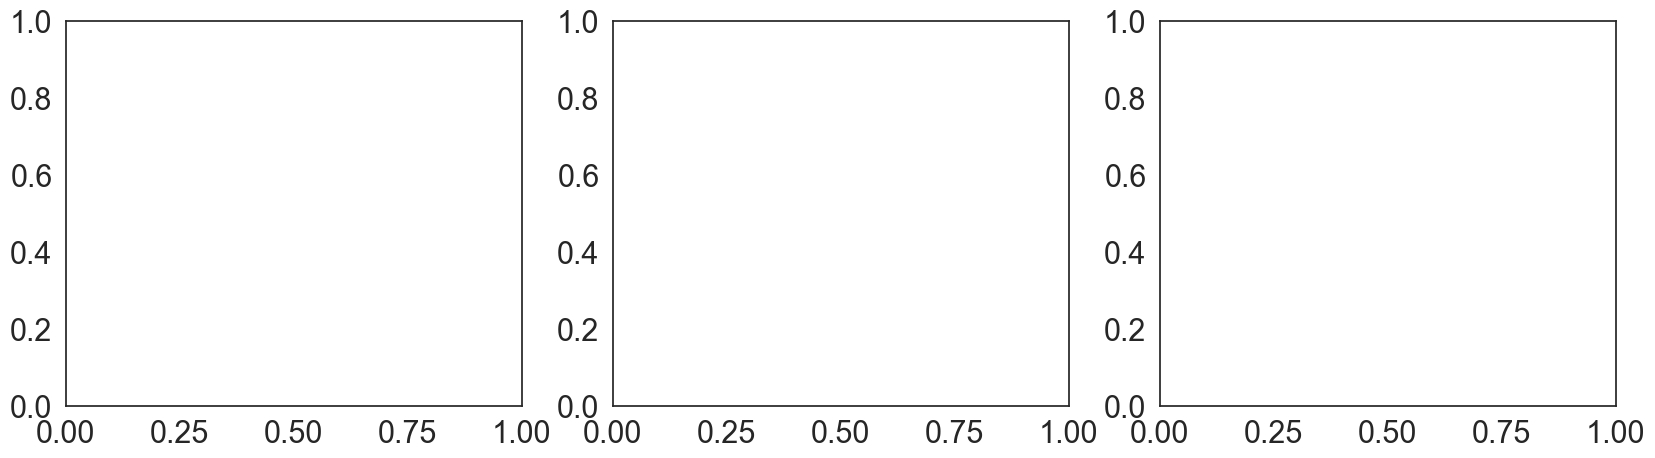

In [51]:
featurizer.feature_plots()